# training histories for all models trained with searchnets stimuli

In [1]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pyprojroot
import seaborn as sns

import searchnets

#### helper functions

In [2]:
def cm_to_inches(cm):
    return cm / 2.54

#### constants

In [3]:
SOURCE_DATA_ROOT = pyprojroot.here('results/searchstims/source_data/10stims')

FIGURES_ROOT = pyprojroot.here('docs/paper/figures/experiment-1/searchstims-10stims')

In [4]:
df_trainhist = pd.read_csv(SOURCE_DATA_ROOT.joinpath('training_history.csv'))

In [5]:
df_trainhist.head()

,step,loss/train,loss/val,acc/val,replicate,net_name,method,mode
0,1,0.692986,NaN,NaN,1,alexnet,initialize,classify
1,2,0.692191,NaN,NaN,1,alexnet,initialize,classify
2,3,0.695529,NaN,NaN,1,alexnet,initialize,classify
3,4,0.694623,NaN,NaN,1,alexnet,initialize,classify
4,5,0.696026,NaN,NaN,1,alexnet,initialize,classify


#### make figures
first, figure in paper

In [6]:
RC= {'axes.labelsize': 6,
     'axes.titlesize': 6,
     'xtick.labelsize': 4,
     'ytick.labelsize': 4,
     'legend.fontsize': 4,   
     }

sns.set_style("darkgrid")
sns.set_context("paper", rc=RC)

N_ROWS = 2
N_COLS = 3  # train loss, val loss, val acc for transfer / initalize

DPI=300
FIGSIZE = tuple(cm_to_inches(size) for size in (10, 5))


ys = ['loss/train', 'loss/val', 'acc/val']
ylabels = ['loss', 'loss', 'accuracy']
col_labels = ['training', 'validation', 'validation']

def trainhist(df_trainhist, net_name, save_root=FIGURES_ROOT, save_fig=False):
    fig, ax = plt.subplots(N_ROWS, N_COLS, figsize=FIGSIZE, dpi=DPI)
    
    
    df_net_trainhist = df_trainhist[df_trainhist.net_name == net_name]
    for method in df_net_trainhist.method.unique():
        df_method_trainhist = df_net_trainhist[df_net_trainhist.method == method]
        n_replicates = len(df_method_trainhist.replicate.unique())
        if method == 'transfer':
            row = 0
            palette = sns.color_palette("Set2", n_colors=n_replicates)
        elif method == 'initialize':
            row = 1
            palette = sns.color_palette("Set1", n_colors=n_replicates)

        for col, (y, ylabel, col_label) in enumerate(zip(ys, ylabels, col_labels)):
            sns.lineplot(x='step', y=y, hue='replicate', data=df_method_trainhist, 
                         ci=None, legend=False, alpha=0.75, ax=ax[row, col], palette=palette,
                         linewidth=0.5);
            ax[row, col].set_ylabel(ylabel)
            ax[row, col].set_xlabel('')
            ax[row, col].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:0.2f}'))
            if row == 0:
                ax[row, col].set_title(col_label)
            ax[row, col].tick_params(axis='both', which='both', length=0)  # turn off invisible ticks

            ax[row, 0].set_ylim([-0.1, 1])
            ax[row, 1].set_ylim([-0.1, 1])
            ax[row, 2].set_ylim([0., 1.1])

            if col == 0:
                if row == 0:
                    ax[row, col].text(0, -0.5, method, fontweight='bold', fontsize=6)
                elif row == 1:
                    ax[row, col].text(0, -0.5, method, fontweight='bold', fontsize=6)

    ax[1, 1].set_xlabel('step', fontsize=6)

    fig.tight_layout(h_pad=.01, w_pad=0.1)

    if save_fig:
        for ext in ('svg', 'png'):
            fig_path = save_root.joinpath(
                f'{net_name}-training-history.{ext}'
            )
            plt.savefig(fig_path, bbox_inches='tight')

figure with all training histories

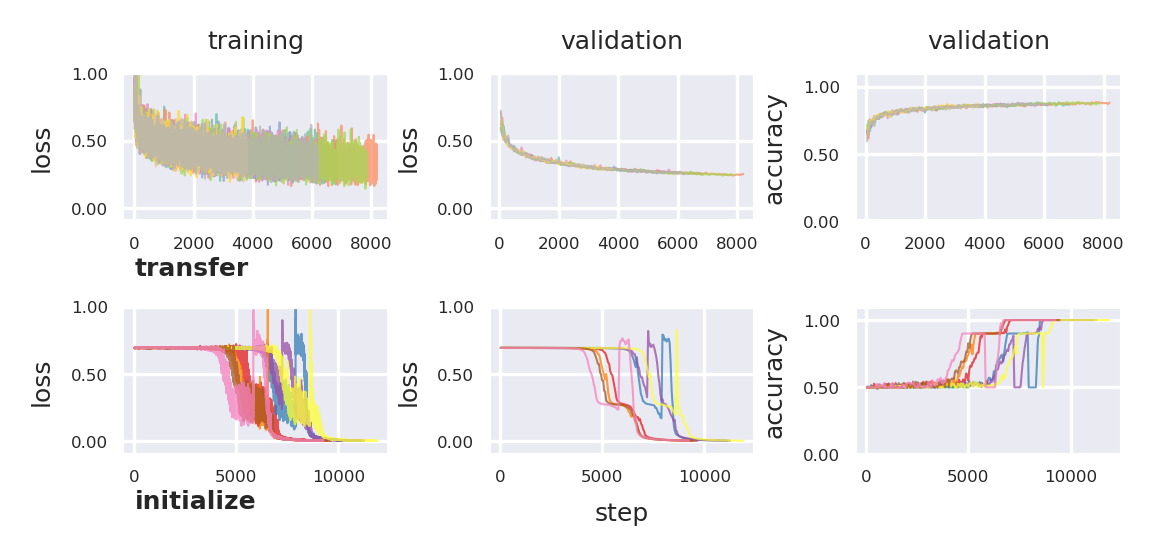

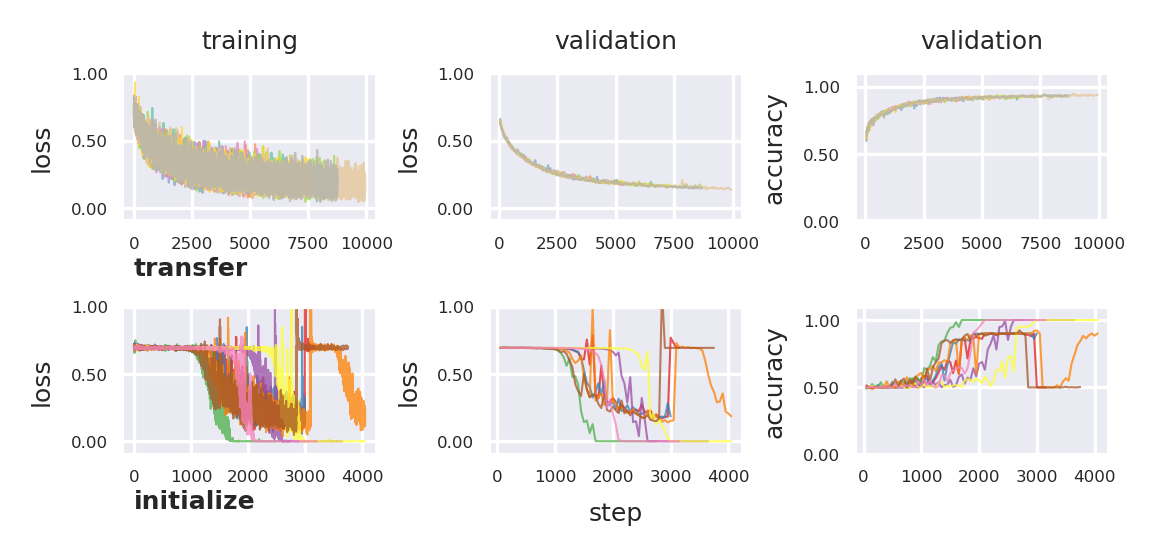

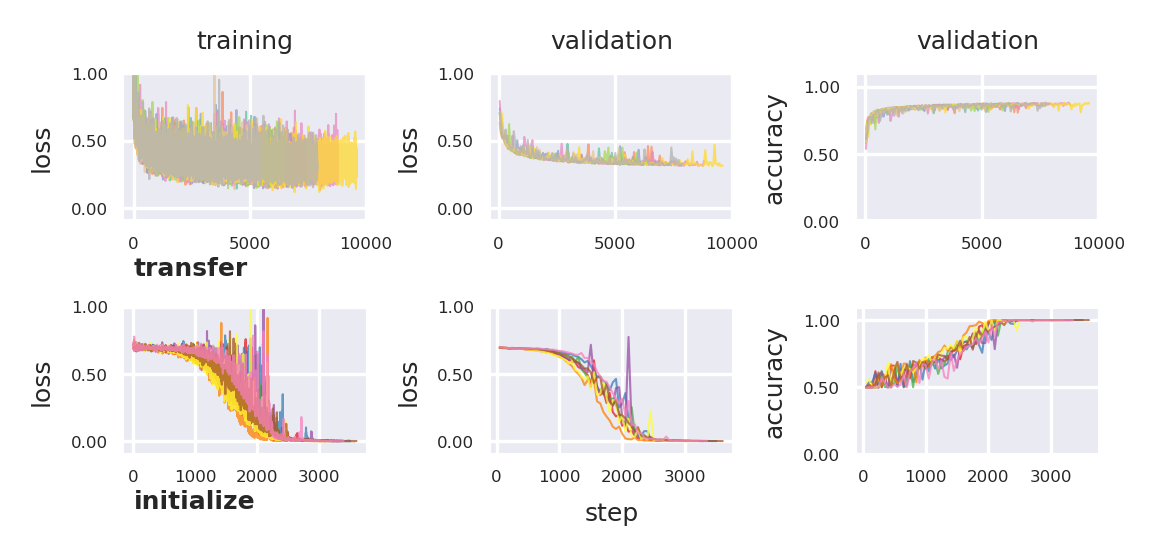

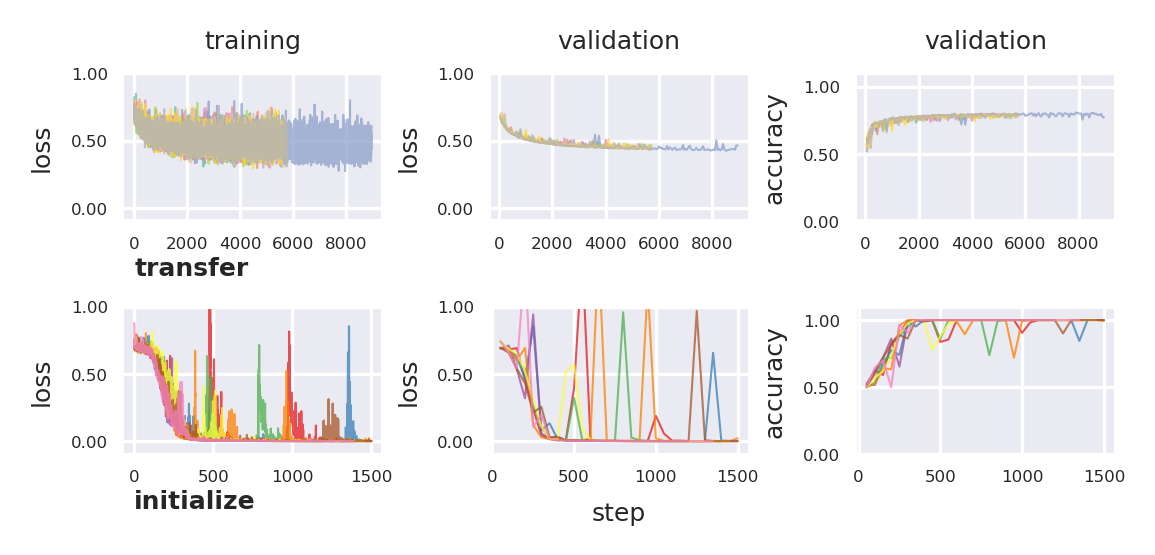

In [7]:
for net_name in df_trainhist.net_name.unique():
    trainhist(df_trainhist, net_name, save_root=FIGURES_ROOT, save_fig=True)